This are a demo and instructions for using the graph module, Laplacians for Julia. 


In [1]:
pwd()

"/Users/spielman/git/Laplacians.jl/notebooks"

In [3]:
push!(LOAD_PATH,"src")
using Laplacians

While you do not stricly need the following, it will allow you to plot without using Laplacians routines.

In [8]:
using PyPlot

In [9]:
VERSION

v"0.4.0"

# Graph Generators

In [10]:
gr = grid2(4)

16x16 sparse matrix with 48 Float64 entries:
	[2 ,  1]  =  1.0
	[5 ,  1]  =  1.0
	[1 ,  2]  =  1.0
	[3 ,  2]  =  1.0
	[6 ,  2]  =  1.0
	[2 ,  3]  =  1.0
	[4 ,  3]  =  1.0
	[7 ,  3]  =  1.0
	[3 ,  4]  =  1.0
	[8 ,  4]  =  1.0
	⋮
	[16, 12]  =  1.0
	[9 , 13]  =  1.0
	[14, 13]  =  1.0
	[10, 14]  =  1.0
	[13, 14]  =  1.0
	[15, 14]  =  1.0
	[11, 15]  =  1.0
	[14, 15]  =  1.0
	[16, 15]  =  1.0
	[12, 16]  =  1.0
	[15, 16]  =  1.0

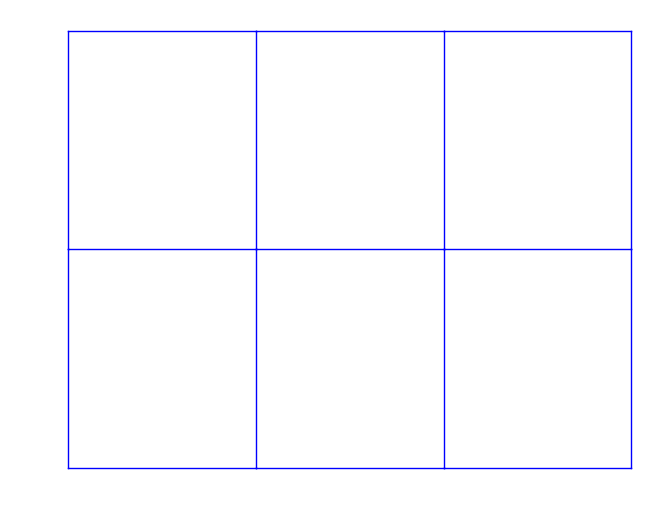

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318464290>

In [11]:
gr = grid2(4,3)
(x,y) = grid2coords(4,3)
p = plotGraph(gr,x,y;dots=false)

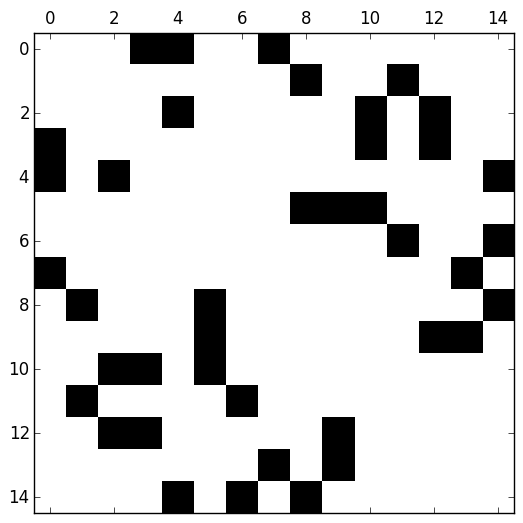

PyObject <matplotlib.image.AxesImage object at 0x317aca1d0>

In [12]:
gr = randRegular(15,3)
spy(gr)

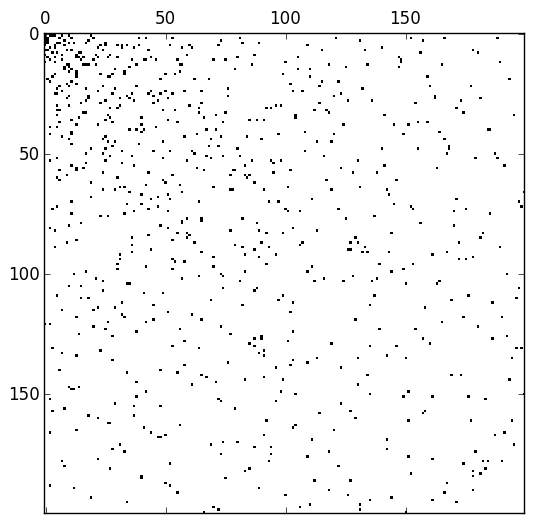

PyObject <matplotlib.image.AxesImage object at 0x319555990>

In [13]:
gr = grownGraph(200,2)
spy(gr)

In [14]:
gr = full(hyperCube(3))

8x8 Array{Float64,2}:
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0

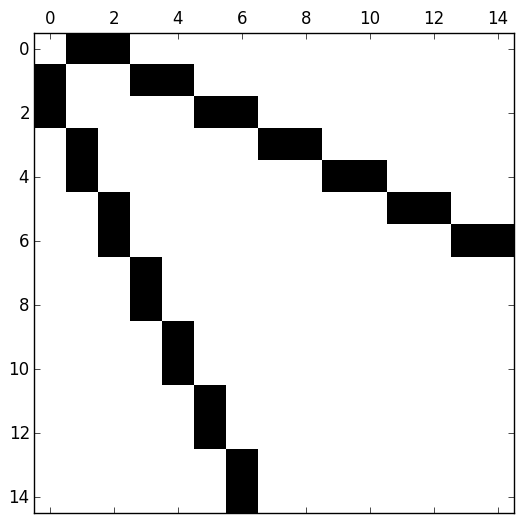

PyObject <matplotlib.image.AxesImage object at 0x31959d290>

In [15]:
a = completeBinaryTree(15)
spy(a)

In [16]:
a0 = completeBinaryTree(3)
a1 = completeBinaryTree(5)
a = productGraph(a0,a1)
[eig(full(a))[1]';
sort(kron(eig(full(a0))[1],ones(5)) + kron(ones(3),eig(full(a1))[1]))']

2x15 Array{Float64,2}:
 -3.26197  -2.17958  -1.84776  …  1.41421  1.84776  2.17958  3.26197
 -3.26197  -2.17958  -1.84776     1.41421  1.84776  2.17958  3.26197

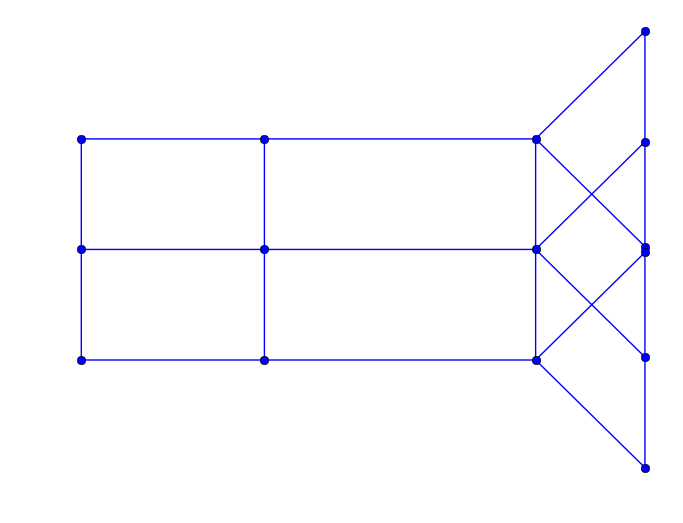

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319dc6310>

In [17]:
spectralDrawing(a)

# Computing Components, and demo of percolation

The following code computes a 30-by-30 grid graph, samples edges with probability 1/2, and then computes the components.

In [18]:
gr = grid2(30);
grs = subsampleEdges(gr,.5);


In [19]:
co = components(grs)

900-element Array{Int64,1}:
   1
   2
   2
   2
   3
   3
   3
   4
   5
   6
   7
   6
   6
   ⋮
 114
 114
 114
 114
  90
  90
  90
  90
  90
  90
  90
 123

In [20]:
comps = vecToComps(co)

123-element Array{Array{Int64,1},1}:
 [1]                                                                             
 [2,3,4]                                                                         
 [5,6,7,35,36,37,66,67]                                                          
 [8,38]                                                                          
 [9,39]                                                                          
 [10,12,13,14,15,16,17,18,19,40,41,42,45,46,47,48,49,76,77,106]                  
 [11]                                                                            
 [20,21,22,23,24,44,50,51,52,53  …  876,877,878,879,880,881,882,883,884,885]     
 [25,26,27,28,29,57,58]                                                          
 [30,59,60,89,90,119,120,149,150,178  …  239,240,266,267,268,269,270,298,300,328]
 [31,32]                                                                         
 [33,34]                                                     

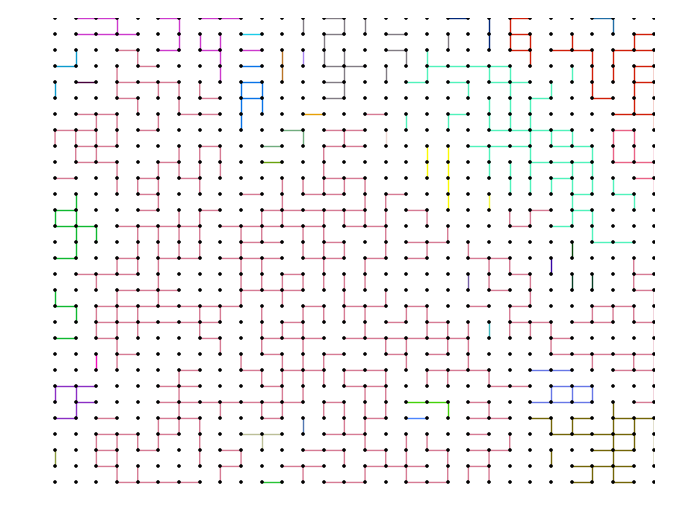

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a214110>

In [21]:
(x,y) = grid2coords(30,30)
for i = 1:length(comps)
    ind = comps[i]
    
    plotGraph(grs[ind,ind],x[ind],y[ind],rand(3);dots=false,setaxis=false)
end
pm = plot(x,y,marker="o",linestyle="none",color="black",markersize=2)

# Loading in a graph

We could read in an edge list, either in ij or ijv form as shown here.  The following is for an ij, and will be used to test the speed of our connected components code.  I generated this graph in matlab, and then saved it using 
<pre>
[asi,asj] = find(triu(as));
dlmwrite('testGraph3.txt',[asi,asj],'precision',9);
</pre>
Note that, without the precision, we won't get all the digits in the vertex ids.

The following is the steps that appear in the function that I have since named readIJ

In [17]:
edlist = readdlm("testGraph3.txt",',')

1200027x2 Array{Float64,2}:
    818.0    1011.0  
    694.0    1069.0  
   1007.0    1106.0  
   1286.0    1328.0  
   1487.0    2672.0  
    336.0    2824.0  
    502.0    2860.0  
   1709.0    3016.0  
   2386.0    3198.0  
    609.0    3369.0  
    620.0    3472.0  
   1219.0    3743.0  
   3078.0    3750.0  
      ⋮              
 971328.0  999996.0  
 294718.0  999997.0  
 680213.0  999997.0  
 123618.0  999998.0  
 689805.0  999998.0  
 974852.0  999998.0  
 644478.0  999999.0  
 826203.0  999999.0  
 937697.0  999999.0  
 447417.0       1.0e6
 599768.0       1.0e6
 842708.0       1.0e6

Let's try to make a sparse matrix with these as entries. Somehow, we will have to first convert to Integer types.


In [18]:
n = maximum(edlist)
m = size(edlist)
edlist = convert(Array{Int64,2}, edlist)

1200027x2 Array{Int64,2}:
    818     1011
    694     1069
   1007     1106
   1286     1328
   1487     2672
    336     2824
    502     2860
   1709     3016
   2386     3198
    609     3369
    620     3472
   1219     3743
   3078     3750
      ⋮         
 971328   999996
 294718   999997
 680213   999997
 123618   999998
 689805   999998
 974852   999998
 644478   999999
 826203   999999
 937697   999999
 447417  1000000
 599768  1000000
 842708  1000000

In [19]:
a = sparse(edlist[:,1],edlist[:,2],ones(m[1]),n,n)
a = a + a'

1000000x1000000 sparse matrix with 2400054 Float64 entries:
	[510839 ,       1]  =  1.0
	[733930 ,       1]  =  1.0
	[413489 ,       2]  =  1.0
	[590646 ,       2]  =  1.0
	[657616 ,       2]  =  1.0
	[314999 ,       3]  =  1.0
	[669176 ,       3]  =  1.0
	[821017 ,       3]  =  1.0
	[678250 ,       4]  =  1.0
	[658936 ,       5]  =  1.0
	⋮
	[294718 ,  999997]  =  1.0
	[680213 ,  999997]  =  1.0
	[123618 ,  999998]  =  1.0
	[689805 ,  999998]  =  1.0
	[974852 ,  999998]  =  1.0
	[644478 ,  999999]  =  1.0
	[826203 ,  999999]  =  1.0
	[937697 ,  999999]  =  1.0
	[447417 , 1000000]  =  1.0
	[599768 , 1000000]  =  1.0
	[842708 , 1000000]  =  1.0

In [20]:
a = readIJ("testGraph3.txt")

1000000x1000000 sparse matrix with 2400054 Float64 entries:
	[510839 ,       1]  =  1.0
	[733930 ,       1]  =  1.0
	[413489 ,       2]  =  1.0
	[590646 ,       2]  =  1.0
	[657616 ,       2]  =  1.0
	[314999 ,       3]  =  1.0
	[669176 ,       3]  =  1.0
	[821017 ,       3]  =  1.0
	[678250 ,       4]  =  1.0
	[658936 ,       5]  =  1.0
	⋮
	[294718 ,  999997]  =  1.0
	[680213 ,  999997]  =  1.0
	[123618 ,  999998]  =  1.0
	[689805 ,  999998]  =  1.0
	[974852 ,  999998]  =  1.0
	[644478 ,  999999]  =  1.0
	[826203 ,  999999]  =  1.0
	[937697 ,  999999]  =  1.0
	[447417 , 1000000]  =  1.0
	[599768 , 1000000]  =  1.0
	[842708 , 1000000]  =  1.0

In [21]:
@time co = components(a);

elapsed time: 0.245377915 seconds (16013976 bytes allocated)


That was 0.23 seconds.  In comparison, calling the Lapsolver routine from matlab for this took longer:
<pre>
>> gr = a2g(a);
>> gu = GraphUtils
>> tic; co = gu.getComponents(gr); toc
Elapsed time is 0.286240 seconds.
</pre>
And, matlab_bgl is even slower
<pre>
>> addpath ~/progs/matlab_bgl/
>> tic; [comp,sz] = components(a); toc
Elapsed time is 1.142663 seconds.
</pre>


Since you probably don't have that graph, let me repeat this experiment with percolation on the grid, again in Matlab and in Julia.
<pre>
>> a = grid2(1000);
>> [ai,aj,av] = find(tril(a));
>> keep = (rand(size(av))>.5);
>> asamp = sparse(ai(keep), aj(keep), av(keep), 1000000, 1000000);
>> asamp = asamp + asamp';
>> gr = a2g(asamp);
>> gu = GraphUtils;
>> tic; co = gu.getComponents(gr); toc
Elapsed time is 0.142004 seconds.

>> addpath ~/progs/matlab_bgl/
>> tic; [comp,sz] = components(asamp); toc
Elapsed time is 0.238816 seconds.
</pre>


In [22]:
a = grid2(1000);
asamp = subsampleEdges(a,.5);
@time co = components(asamp);

elapsed time: 0.061865921 seconds (16000176 bytes allocated)


In case that data disappears somehow, that was:
* Julia : .073 seconds
* Java : 0.14 seconds
* bgl : 0.23 seconds

If we want to use less memory, we can convert the indices in the graph to Int32 from Int64.  I would have expected this to speed up the code, but it does not seem to do so.

In [23]:
ashort = shortIntGraph(asamp)
@time co = components(ashort);

elapsed time: 0.081273256 seconds (8788292 bytes allocated)


# Shortest Paths

I will now compare the running time of two versions of shortest paths code that I wrote in Julia against matlab_bgl and my java code.  The "slow" version uses Julia's own priority queues.  The faster version uses my own priority queue called nodeHeap, and is an exact transcription of my java code.  It is about 10x faster!  It could be sped up some more, but this proves the point. 

In [24]:
a = readIJ("testGraph3.txt");

In [25]:
@time dists, pArray = shortestPathsSlow(a,1)

LoadError: shortestPathsSlow not defined
while loading In[25], in expression starting on line 56

In [26]:
@time dists2, pArray2 = shortestPaths(a,1)

elapsed time: 1.048791785 seconds (58771332 bytes allocated)


([0.0,24.0,21.0,27.0,27.0,26.0,28.0,25.0,23.0,29.0  …  27.0,26.0,27.0,23.0,18.0,27.0,32.0,24.0,26.0,30.0],[1,413489,314999,678250,658936,354779,69630,524827,526010,250595  …  138172,989352,573588,422440,987571,511908,680213,123618,826203,447417])

Here are the results in Matlab.
<pre>
>> dl = dlmread('testGraph3.txt');
a = sparse(dl(:,1),dl(:,2),1);
n = max(max(dl))
a(n,n) = 0;
a = a + a';
>> [ai,aj,av] = find(tril(a));
pg = graphs.PreGraph(ai,aj,av)
>> tic; pa = pg.shortestPathTree(0); toc
Elapsed time is 1.428569 seconds.

tic; [d pa] = shortest_paths(a,1); toc
Elapsed time is 1.795666 seconds.
</pre>

This is a very clear win for Julia!

Let's fight against one other random graph distribution, just to check.

<pre>
a = randRegular(1000000,3);
[ai,aj,av] = find(a);
ar = sparse(ai,aj,rand(size(av)));
ar2 = sparse(ai,aj,1./rand(size(av)));
tic; [d pa] = shortest_paths(ar,1); toc
Elapsed time is 3.066359 seconds.
tic; [d pa] = shortest_paths(ar2,1); toc
Elapsed time is 3.124175 seconds.

pg = graphs.PreGraph(ai,aj,av);
tic; pa = pg.shortestPathTree(0); toc
Elapsed time is 3.151916 seconds.
[ai,aj,av] = find(tril(ar2));
pg = graphs.PreGraph(ai,aj,av);
tic; pa = pg.shortestPathTree(0); toc
Elapsed time is 2.916280 seconds.
</pre>
So, the time to beat is 3 seconds.  Julia does it in just a little over 2, as we will now see.


In [22]:
a = randRegular(1000000,3);
(ai,aj,av) = findnz(triu(a));
ar = sparse(ai,aj,rand(length(av)),1000000,1000000);
ar = ar + ar';
ar2 = sparse(ai,aj,1./rand(length(av)),1000000,1000000);
ar2 = ar2 + ar2';

In [23]:
@time dists2, pArray2 = shortestPaths(ar,1)

([0.0,46.8644,51.3727,40.5742,41.011,38.6967,43.4538,51.109,41.8025,42.6108  …  41.0062,51.5306,52.3109,44.2131,46.1396,35.0494,45.1835,47.4594,42.5423,47.7676],[1,133202,865499,111025,181732,848643,541174,47502,475460,356216  …  685815,543178,645762,258592,98661,54117,476329,379568,377431,490217])

2.000049 seconds (44.46 k allocations: 56.235 MB, 3.62% gc time)


In [25]:
@time dists2, pArray2 = shortestPaths(ar2,1);

  1.868929 seconds (24 allocations: 54.360 MB, 0.44% gc time)


# Minimum Spanning Trees

We will also compare the running time of mst code.  In this case, I will do it with a 2d grid with randomly chosen edge weights.  We will see that the Julia code is over twice as fast as the matlab_bgl and java code that we have.

In [26]:
a = grid2(1000)
n = size(a)[1]
(ai,aj,av) = findnz(triu(a))
ar = sparse(ai,aj,rand(size(av)),n,n)
ar = ar + ar'

1000000x1000000 sparse matrix with 3996000 Float64 entries:
	[2      ,       1]  =  0.513296
	[1001   ,       1]  =  0.395054
	[1      ,       2]  =  0.513296
	[3      ,       2]  =  0.66052
	[1002   ,       2]  =  0.918124
	[2      ,       3]  =  0.66052
	[4      ,       3]  =  0.529703
	[1003   ,       3]  =  0.224731
	[3      ,       4]  =  0.529703
	[5      ,       4]  =  0.72409
	⋮
	[998997 ,  999997]  =  0.906153
	[999996 ,  999997]  =  0.833383
	[999998 ,  999997]  =  0.0143553
	[998998 ,  999998]  =  0.0505353
	[999997 ,  999998]  =  0.0143553
	[999999 ,  999998]  =  0.949815
	[998999 ,  999999]  =  0.911905
	[999998 ,  999999]  =  0.949815
	[1000000,  999999]  =  0.500773
	[999000 , 1000000]  =  0.203006
	[999999 , 1000000]  =  0.500773

In [27]:
@time tree = kruskal(ar);

  1.773101 seconds (53.80 k allocations: 284.535 MB, 7.72% gc time)


<pre>
>> a = grid2(1000);
>> n = length(a);
>> [ai,aj,av] = find(triu(a));
>> ar = sparse(ai,aj,rand(length(av),1),n,n); ar = ar + ar';
>> tic; t = kruskal_mst(ar); toc
Elapsed time is 6.501457 seconds.
>> gr = a2g(ar);
>> kt = KruskalTree;
>> tic; tr = kt.getTree(gr); toc
Elapsed time is 6.141985 seconds.
</pre>

By default, this computes the minimum spanning tree.  To get the max, do this.

In [28]:
@show sum(triu(tree).nzval)
maxTree = kruskal(ar,kind="max")
@show sum(triu(maxTree).nzval)

sum(triu(tree).nzval) = 267475.5529301878
sum(triu(maxTree).nzval) = 732585.5724404071

732585.5724404071

# Spectral Graph Drawing

In [29]:
la = lap(grid2(3))

9x9 sparse matrix with 33 Float64 entries:
	[1, 1]  =  2.0
	[2, 1]  =  -1.0
	[4, 1]  =  -1.0
	[1, 2]  =  -1.0
	[2, 2]  =  3.0
	[3, 2]  =  -1.0
	[5, 2]  =  -1.0
	[2, 3]  =  -1.0
	[3, 3]  =  2.0
	[6, 3]  =  -1.0
	⋮
	[9, 6]  =  -1.0
	[4, 7]  =  -1.0
	[7, 7]  =  2.0
	[8, 7]  =  -1.0
	[5, 8]  =  -1.0
	[7, 8]  =  -1.0
	[8, 8]  =  3.0
	[9, 8]  =  -1.0
	[6, 9]  =  -1.0
	[8, 9]  =  -1.0
	[9, 9]  =  2.0

In [30]:
E = eigs(la, nev = 3, which=:SR)
V = E[2]

9x3 Array{Float64,2}:
 -0.333333   0.0132871    -0.577197   
 -0.333333  -0.281955     -0.295242   
 -0.333333  -0.577197     -0.0132871  
 -0.333333   0.295242     -0.281955   
 -0.333333  -2.22045e-16  -1.11022e-16
 -0.333333  -0.295242      0.281955   
 -0.333333   0.577197      0.0132871  
 -0.333333   0.281955      0.295242   
 -0.333333  -0.0132871     0.577197   

You would think that you should use
<pre>
E = eigs(la, nev = 3, which=:SM)
</pre>
But, that gives horrible results.

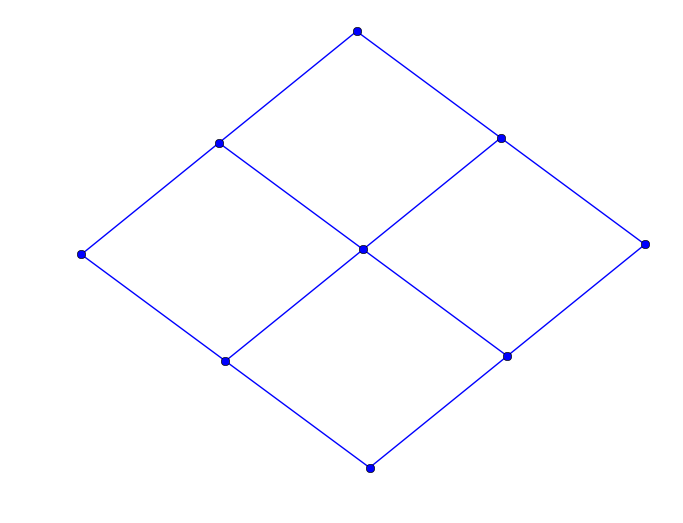

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31b5a7f50>

In [31]:
plotGraph(la,V[:,2],V[:,3])

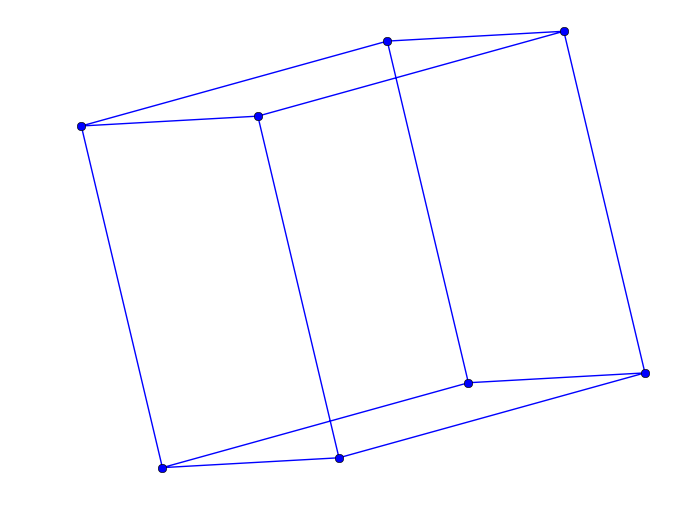

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31b853150>

In [32]:
a = hyperCube(3)
la = lap(a)
E = eigs(la, nev = 3, which=:SR)
V = E[2]
plotGraph(a,V[:,2],V[:,3])

# Here is a look under the hood of sparse matrices

In [33]:
a = grid2(5)
typeof(a)

SparseMatrixCSC{Float64,Int64}

In [37]:
fieldnames(SparseMatrixCSC)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 